In [1]:
from google.colab import drive

drive.mount('/content/ColabNotebooks')

Mounted at /content/ColabNotebooks


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import warnings
from keras.preprocessing.image import ImageDataGenerator
import cv2
warnings.filterwarnings('ignore')

In [4]:
projet_path = "/content/ColabNotebooks/MyDrive/faces_set/Images_crop"

In [5]:
imgPath0 = [ ]
#+str(j+1)+'/'
for j in range(113): 
  i = str(j+1)
  for f in os.listdir(projet_path+'/Sujet'+i):
    
   objectPaths = os.path.join(projet_path+'/Sujet'+str(j+1)+'/' ,f) 
   #print(f)
   print(objectPaths)
   imgPath0.append(objectPaths)

/content/ColabNotebooks/MyDrive/faces_set/Images_crop/Sujet1/Sujet1-3.jpg
/content/ColabNotebooks/MyDrive/faces_set/Images_crop/Sujet1/Sujet1-2.jpg
/content/ColabNotebooks/MyDrive/faces_set/Images_crop/Sujet1/Sujet1-5.jpg
/content/ColabNotebooks/MyDrive/faces_set/Images_crop/Sujet1/Sujet1-4.jpg
/content/ColabNotebooks/MyDrive/faces_set/Images_crop/Sujet1/Sujet1-1.jpg
/content/ColabNotebooks/MyDrive/faces_set/Images_crop/Sujet2/Sujet2-1.jpg
/content/ColabNotebooks/MyDrive/faces_set/Images_crop/Sujet2/Sujet2-2.jpg
/content/ColabNotebooks/MyDrive/faces_set/Images_crop/Sujet2/Sujet2-3.jpg
/content/ColabNotebooks/MyDrive/faces_set/Images_crop/Sujet2/Sujet2-4.jpg
/content/ColabNotebooks/MyDrive/faces_set/Images_crop/Sujet2/Sujet2-5.jpg
/content/ColabNotebooks/MyDrive/faces_set/Images_crop/Sujet3/Sujet3-1.jpg
/content/ColabNotebooks/MyDrive/faces_set/Images_crop/Sujet3/Sujet3-2.jpg
/content/ColabNotebooks/MyDrive/faces_set/Images_crop/Sujet3/Sujet3-3.jpg
/content/ColabNotebooks/MyDrive/faces_

In [6]:
patttth='/content/ColabNotebooks/MyDrive/faces_set/Images_crop/Sujet106/Sujet106-3.jpg'

In [7]:
relative_path0 =patttth.split('/')[-1].split('_')[0].split('-')[0][5:]

In [8]:
int(relative_path0)

106

In [12]:
relative_paths=[]
categories = []
for filename in imgPath0:
    rp = os.path.relpath(filename,"/content/ColabNotebooks/MyDrive/faces_set/Images_crop")
    relative_path =filename.split('/')[-1].split('_')[0].split('-')[0]
    relative_paths.append(relative_path)
    
df = pd.DataFrame({
    'image': imgPath0,
    'label': relative_paths
})

df

,image,label
0,/content/ColabNotebooks/MyDrive/faces_set/Imag...,Sujet1
1,/content/ColabNotebooks/MyDrive/faces_set/Imag...,Sujet1
2,/content/ColabNotebooks/MyDrive/faces_set/Imag...,Sujet1
3,/content/ColabNotebooks/MyDrive/faces_set/Imag...,Sujet1
4,/content/ColabNotebooks/MyDrive/faces_set/Imag...,Sujet1
...,...,...
555,/content/ColabNotebooks/MyDrive/faces_set/Imag...,Sujet113
556,/content/ColabNotebooks/MyDrive/faces_set/Imag...,Sujet113
557,/content/ColabNotebooks/MyDrive/faces_set/Imag...,Sujet113
558,/content/ColabNotebooks/MyDrive/faces_set/Imag...,Sujet113


In [ ]:
df.com

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# create a data generator

#We need to normalize image
datagentrain = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True,rescale=1./255)
datagentest =ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True,rescale=1./255)


In [14]:
datagentrain.mean = np.array([127.5, 127.5, 127.5], dtype=np.float32).reshape((1,1,3))
datagentrain.std = 255.0
datagentest.mean = np.array([127.5, 127.5, 127.5], dtype=np.float32).reshape((1,1,3))
datagentest.std = 255.0

In [15]:
datagentrain = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True,
                                  brightness_range=[0.1,1.0]
                                 )
datagentest = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
datagentrain.mean = np.array([127.5, 127.5, 127.5], dtype=np.float32).reshape((1,1,3))
datagentrain.std = 255.0
datagentest.mean = np.array([127.5, 127.5, 127.5], dtype=np.float32).reshape((1,1,3))
datagentest.std = 255.0

In [ ]:
X1 = df.drop('label',axis=1)
X = X1.values
y = df['label'].values


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size=0.4 , random_state=42,stratify=df.label)

In [17]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df,test_size = 0.4, stratify=df.label)

In [18]:
traingenerator = datagentrain.flow_from_dataframe( train_df , '/',x_col = 'image' , y_col = 'label', target_size = (200,150) ,class_mode='categorical', batch_size = 32, shuffle = False)
testgenerator = datagentest.flow_from_dataframe( test_df , '/',x_col = 'image' , y_col = 'label', target_size = (200,150) ,class_mode='categorical', batch_size = 32, shuffle = False)

Found 336 validated image filenames belonging to 112 classes.
Found 224 validated image filenames belonging to 112 classes.


In [19]:
test_df

,image,label
136,/content/ColabNotebooks/MyDrive/faces_set/Imag...,Sujet28
559,/content/ColabNotebooks/MyDrive/faces_set/Imag...,Sujet113
288,/content/ColabNotebooks/MyDrive/faces_set/Imag...,Sujet59
327,/content/ColabNotebooks/MyDrive/faces_set/Imag...,Sujet67
158,/content/ColabNotebooks/MyDrive/faces_set/Imag...,Sujet32
...,...,...
336,/content/ColabNotebooks/MyDrive/faces_set/Imag...,Sujet69
151,/content/ColabNotebooks/MyDrive/faces_set/Imag...,Sujet31
127,/content/ColabNotebooks/MyDrive/faces_set/Imag...,Sujet26
284,/content/ColabNotebooks/MyDrive/faces_set/Imag...,Sujet58


In [ ]:
X1 = test_df.drop('label',axis=1)
X = X1.values
y = test_df['label'].values

In [ ]:
y

array([ 27,  86, 101,   8,   3,  40,  29,  64,  97,  54,  93,  89,  16,
       102,  69,  95,  55, 106,  45,  11,  71, 104,  57,  49,  55,  26,
        31,  25, 109,  83,  74,  86,  65,  29,  95,  24,  99,  33,  79,
        75,  68,   2,  89,  87,  16,  12,  43,  96,  19,   4,  79,  42,
        51, 112,   6,  31,  42,   7,  27,  26, 106,  72,  35,  91,  23,
        17,  20,  63,  50, 100,   2,  48,  44,  39,  62,  60, 102,  58,
        38,  85,  11,  46,   8,  40,  32,  41,  77,  45,  64,  46,  74,
        13,  56,  30,  99,   4,  53,  37,  28,  32,   6,   5,  71,  24,
        37,  90,  53,  22,  81,   9,  77,  61,  97,  34,  66,  84,   5,
        14,  65,  54,  96,  62,  20,  21,  61,  59,  85,  52,  44,  84,
        35,  39, 103, 109,  34,  70,  56,  21, 113,  15,  78,  67,  58,
       112,  80, 105, 113,   3,  66,  36,  75,  87,  67,  88,  50,  98,
        33, 107, 110,   7,  70,  72, 108,  94,  63,  12, 107, 101,  22,
        81, 111, 100,  88, 108,  59,  98,  52,  60, 105,  38,  7

In [20]:
train_df

,image,label
10,/content/ColabNotebooks/MyDrive/faces_set/Imag...,Sujet3
360,/content/ColabNotebooks/MyDrive/faces_set/Imag...,Sujet74
354,/content/ColabNotebooks/MyDrive/faces_set/Imag...,Sujet72
457,/content/ColabNotebooks/MyDrive/faces_set/Imag...,Sujet93
42,/content/ColabNotebooks/MyDrive/faces_set/Imag...,Sujet9
...,...,...
21,/content/ColabNotebooks/MyDrive/faces_set/Imag...,Sujet5
145,/content/ColabNotebooks/MyDrive/faces_set/Imag...,Sujet30
257,/content/ColabNotebooks/MyDrive/faces_set/Imag...,Sujet53
167,/content/ColabNotebooks/MyDrive/faces_set/Imag...,Sujet34


#CNN


##model

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization, SpatialDropout2D

model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(200, 150, 3),strides=(1, 1), padding='valid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization(axis = -1))

model.add(Conv2D(64, (4,3), activation='relu',strides=(1, 1), padding='valid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization(axis = -1))

model.add(Conv2D(128, (5,4), activation='relu',strides=(1, 1), padding='valid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization(axis = -1))

model.add(Conv2D(256, (5,5), activation='relu',strides=(1, 1), padding='valid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization(axis = -1))

model.add(Conv2D(512, (5,5), activation='relu',strides=(1, 1), padding='valid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization(axis = -1))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))
model.add(Dense(df.label.nunique(), activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 74, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 99, 74, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 72, 64)        24640     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 36, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 36, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 33, 128)       1

In [ ]:
history = model.fit_generator(
    traingenerator, 
    epochs=30,
    validation_data = testgenerator,
    validation_steps= len(testgenerator),
    steps_per_epoch = len(traingenerator)
)

Epoch 1/15
33/33 [==============================] - 0s 7ms/step - loss: 0.6634 - accuracy: 0.6496 - val_loss: 0.4754 - val_accuracy: 0.8333
Epoch 2/15
33/33 [==============================] - 0s 2ms/step - loss: 0.4567 - accuracy: 0.8247 - val_loss: 0.3734 - val_accuracy: 0.8902
Epoch 3/15
33/33 [==============================] - 0s 3ms/step - loss: 0.3665 - accuracy: 0.8809 - val_loss: 0.3163 - val_accuracy: 0.9053
Epoch 4/15
33/33 [==============================] - 0s 2ms/step - loss: 0.3209 - accuracy: 0.8837 - val_loss: 0.2797 - val_accuracy: 0.9091
Epoch 5/15
33/33 [==============================] - 0s 3ms/step - loss: 0.2687 - accuracy: 0.9153 - val_loss: 0.2542 - val_accuracy: 0.9129
Epoch 6/15
33/33 [==============================] - 0s 2ms/step - loss: 0.2527 - accuracy: 0.9166 - val_loss: 0.2360 - val_accuracy: 0.9280
Epoch 7/15
33/33 [==============================] - 0s 2ms/step - loss: 0.2321 - accuracy: 0.9173 - val_loss: 0.2222 - val_accuracy: 0.9242
Epoch 8/15
33/33 [==

In [ ]:
Y_pred = model.predict_generator(testgenerator, len(testgenerator))
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(np.array(testgenerator.classes), y_pred))
print('Classification Report')
target_names = df.label.unique()
print(classification_report(np.array(testgenerator.classes), y_pred, target_names=target_names))

Confusion Matrix
[[2 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 2]]
Classification Report
              precision    recall  f1-score   support

      Sujet1       1.00      1.00      1.00         2
      Sujet2       1.00      1.00      1.00         2
      Sujet3       1.00      1.00      1.00         2
      Sujet4       1.00      1.00      1.00         2
      Sujet5       1.00      1.00      1.00         2
      Sujet6       1.00      1.00      1.00         2
      Sujet7       1.00      1.00      1.00         2
      Sujet8       1.00      1.00      1.00         2
      Sujet9       1.00      1.00      1.00         2
     Sujet10       1.00      0.50      0.67         2
     Sujet11       1.00      1.00      1.00         2
     Sujet12       1.00      1.00      1.00         2
     Sujet13       1.00      1.00      1.00         2
     Sujet14       1.00      1.00      1.00         2
     Sujet15       1.00      1

In [ ]:
df_model2=pd.DataFrame(columns=(['image','predicted_person','vrai_person']))

In [ ]:
df_model2

,image,predicted_person,vrai_person


In [ ]:
Y_pred = model.predict_generator(testgenerator, len(testgenerator))
y_pred = np.argmax(Y_pred, axis=1)

In [ ]:
y_pred

[12,
 103,
 108,
 105,
 25,
 100,
 112,
 66,
 7,
 66,
 111,
 32,
 55,
 11,
 45,
 35,
 97,
 37,
 42,
 23,
 64,
 41,
 79,
 58,
 86,
 14,
 70,
 72,
 12,
 113,
 59,
 7,
 87,
 62,
 81,
 50,
 100,
 49,
 21,
 74,
 22,
 17,
 77,
 26,
 72,
 62,
 24,
 20,
 10,
 20,
 14,
 91,
 43,
 58,
 27,
 56,
 3,
 75,
 29,
 30,
 89,
 18,
 107,
 2,
 60,
 95,
 4,
 18,
 8,
 34,
 92,
 88,
 2,
 76,
 57,
 30,
 71,
 73,
 92,
 15,
 69,
 102,
 19,
 16,
 81,
 93,
 25,
 53,
 9,
 13,
 63,
 26,
 22,
 57,
 80,
 39,
 103,
 84,
 68,
 101,
 15,
 32,
 5,
 73,
 52,
 94,
 96,
 8,
 21,
 36,
 94,
 40,
 33,
 107,
 86,
 51,
 38,
 28,
 93,
 54,
 82,
 20,
 76,
 67,
 83,
 16,
 97,
 68,
 35,
 6,
 36,
 53,
 49,
 99,
 51,
 48,
 102,
 63,
 61,
 109,
 3,
 65,
 1,
 64,
 56,
 29,
 44,
 108,
 90,
 4,
 85,
 104,
 23,
 48,
 46,
 74,
 78,
 105,
 38,
 17,
 67,
 52,
 99,
 110,
 40,
 50,
 98,
 42,
 31,
 27,
 15,
 9,
 106,
 34,
 88,
 31,
 79,
 41,
 87,
 104,
 54,
 89,
 106,
 111,
 109,
 83,
 6,
 95,
 80,
 64,
 84,
 101,
 24,
 69,
 98,
 71,
 45,
 77,
 

In [ ]:
ge

In [ ]:
for i in range(224):
  y_predict1 =y_pred[i]
  y_vrai=test_df['label'].iloc[i]
  image=imgPath0[i]
  row={'image':image,'predicted_person':y_predict1,'vrai_person':y_vrai}
  df_model2=df_model2.append(row,ignore_index=True)

In [ ]:
df_model2

,image,predicted_person,vrai_person
0,/content/ColabNotebooks/MyDrive/faces_set/Imag...,12,12
1,/content/ColabNotebooks/MyDrive/faces_set/Imag...,103,103
2,/content/ColabNotebooks/MyDrive/faces_set/Imag...,108,108
3,/content/ColabNotebooks/MyDrive/faces_set/Imag...,105,105
4,/content/ColabNotebooks/MyDrive/faces_set/Imag...,25,25
...,...,...,...
219,/content/ColabNotebooks/MyDrive/faces_set/Imag...,65,65
220,/content/ColabNotebooks/MyDrive/faces_set/Imag...,70,70
221,/content/ColabNotebooks/MyDrive/faces_set/Imag...,55,55
222,/content/ColabNotebooks/MyDrive/faces_set/Imag...,5,5


In [ ]:
modele_reliability=0
for index,row in df_model2.iterrows():
  if row['predicted_person']==row['vrai_person']:
    modele_reliability=modele_reliability+1

In [ ]:
print('les image bien detetcte',len(test_df)-modele_reliability)

les image bien detetcte 214


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

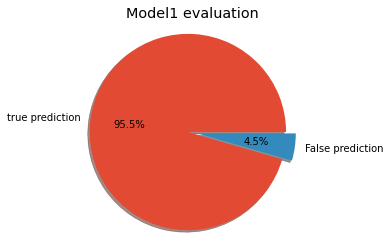

In [ ]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'true prediction', 'False prediction'
sizes = [len(test_df)-modele_reliability, modele_reliability]
explode = (0, 0.1)  
 # only "explode" the 2nd slice (i.e. 'Hogs')
plt.style.use("ggplot")

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode , labels=labels, autopct='%1.1f%%',
        shadow=True)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Model1 evaluation')


plt.show()


##inter

In [ ]:
List_img=test_df['image'].tolist()

In [ ]:
List_img

['/content/ColabNotebooks/MyDrive/faces_set/Images_crop/Sujet87/Sujet87-5.jpg',
 '/content/ColabNotebooks/MyDrive/faces_set/Images_crop/Sujet65/Sujet65-4.jpg',
 '/content/ColabNotebooks/MyDrive/faces_set/Images_crop/Sujet11/Sujet11-4.jpg',
 '/content/ColabNotebooks/MyDrive/faces_set/Images_crop/Sujet18/Sujet18-1.jpg',
 '/content/ColabNotebooks/MyDrive/faces_set/Images_crop/Sujet63/Sujet63-4.jpg',
 '/content/ColabNotebooks/MyDrive/faces_set/Images_crop/Sujet38/Sujet38-4.jpg',
 '/content/ColabNotebooks/MyDrive/faces_set/Images_crop/Sujet85/Sujet85-3.jpg',
 '/content/ColabNotebooks/MyDrive/faces_set/Images_crop/Sujet13/Sujet13-5.jpg',
 '/content/ColabNotebooks/MyDrive/faces_set/Images_crop/Sujet97/Sujet97-2.jpg',
 '/content/ColabNotebooks/MyDrive/faces_set/Images_crop/Sujet106/Sujet106-4.jpg',
 '/content/ColabNotebooks/MyDrive/faces_set/Images_crop/Sujet86/Sujet86-3.jpg',
 '/content/ColabNotebooks/MyDrive/faces_set/Images_crop/Sujet57/Sujet57-1.jpg',
 '/content/ColabNotebooks/MyDrive/face

In [ ]:
len(List_img)

224

In [ ]:
list_comp1 = [(a, b) for idx, a in enumerate(List_img) for b in List_img[idx + 1:]]
list_comp1 #list of all possible pairs of the images 

[('/content/ColabNotebooks/MyDrive/faces_set/Images_crop/Sujet87/Sujet87-5.jpg',
  '/content/ColabNotebooks/MyDrive/faces_set/Images_crop/Sujet65/Sujet65-4.jpg'),
 ('/content/ColabNotebooks/MyDrive/faces_set/Images_crop/Sujet87/Sujet87-5.jpg',
  '/content/ColabNotebooks/MyDrive/faces_set/Images_crop/Sujet11/Sujet11-4.jpg'),
 ('/content/ColabNotebooks/MyDrive/faces_set/Images_crop/Sujet87/Sujet87-5.jpg',
  '/content/ColabNotebooks/MyDrive/faces_set/Images_crop/Sujet18/Sujet18-1.jpg'),
 ('/content/ColabNotebooks/MyDrive/faces_set/Images_crop/Sujet87/Sujet87-5.jpg',
  '/content/ColabNotebooks/MyDrive/faces_set/Images_crop/Sujet63/Sujet63-4.jpg'),
 ('/content/ColabNotebooks/MyDrive/faces_set/Images_crop/Sujet87/Sujet87-5.jpg',
  '/content/ColabNotebooks/MyDrive/faces_set/Images_crop/Sujet38/Sujet38-4.jpg'),
 ('/content/ColabNotebooks/MyDrive/faces_set/Images_crop/Sujet87/Sujet87-5.jpg',
  '/content/ColabNotebooks/MyDrive/faces_set/Images_crop/Sujet85/Sujet85-3.jpg'),
 ('/content/ColabNoteb

In [ ]:
len(list_comp1)

24976

In [ ]:
df_comparaison_inter=pd.DataFrame(columns=(['image1','image2','cousine','vrai_person1','vrai_person2']))

In [ ]:

df_comparaison_inter1 = pd.DataFrame(list_comp1, columns =['image1', 'image2'])

In [ ]:
df_comparaison_inter1

,image1,image2
0,/content/ColabNotebooks/MyDrive/faces_set/Imag...,/content/ColabNotebooks/MyDrive/faces_set/Imag...
1,/content/ColabNotebooks/MyDrive/faces_set/Imag...,/content/ColabNotebooks/MyDrive/faces_set/Imag...
2,/content/ColabNotebooks/MyDrive/faces_set/Imag...,/content/ColabNotebooks/MyDrive/faces_set/Imag...
3,/content/ColabNotebooks/MyDrive/faces_set/Imag...,/content/ColabNotebooks/MyDrive/faces_set/Imag...
4,/content/ColabNotebooks/MyDrive/faces_set/Imag...,/content/ColabNotebooks/MyDrive/faces_set/Imag...
...,...,...
24971,/content/ColabNotebooks/MyDrive/faces_set/Imag...,/content/ColabNotebooks/MyDrive/faces_set/Imag...
24972,/content/ColabNotebooks/MyDrive/faces_set/Imag...,/content/ColabNotebooks/MyDrive/faces_set/Imag...
24973,/content/ColabNotebooks/MyDrive/faces_set/Imag...,/content/ColabNotebooks/MyDrive/faces_set/Imag...
24974,/content/ColabNotebooks/MyDrive/faces_set/Imag...,/content/ColabNotebooks/MyDrive/faces_set/Imag...


def id_person(image_id):
  for ind,row in test_df.iterrows():
    if row['image1']==image_id:
      return row['label']

In [ ]:
for index,row in df_comparaison_inter1.iterrows():
  img1=row['image1']
  img2=row['image2']
  face_id1=id_person(img1)
  face_id2=id_person(img2)
  if(id_person==id_person):
    df_comparaison_inter1= df_comparaison_inter1.drop(index)

In [ ]:
print("nombre de comparaison inter=",len(df_comparaison_inter1))

nombre de comparaison inter= 24863


In [ ]:
df_compare_finale=pd.DataFrame(columns=(['image1','image2','predicted_person1','predicted_person2','model_test']))

In [ ]:
for i in range(len(df_comparaison_inter1) ):
  y_predict1 =model.predict(df_comparaison_inter1['image1'][i])
  y_predict2 =model.predict(df_comparaison_inter1['image2'][i]
  image1=df_comparaison_inter1['image1'][i]
  image2=df_comparaison_inter1['image1'][i]
  row='image1':image1,'image2':image2,'predicted_person1':y_predict1,'predicted_person2':y_predict2}
  df_compare_finale=df_compare_finale.append(row,ignore_index=True)

In [ ]:
modele_reliability2=0
for index,row in df_compare_finale.iterrows():
  if row['predicted_person1']==row['predicted_person2']:
    modele_reliability2=modele_reliability2+1

In [ ]:
df_comparaison_extract=df_comparaison_inter1.head(637)

In [ ]:
df_comparaison_extract

,image1,image2,predicted_person1,predicted_person2
0,/content/ColabNotebooks/MyDrive/faces_set/Imag...,/content/ColabNotebooks/MyDrive/faces_set/Imag...,12,10
1,/content/ColabNotebooks/MyDrive/faces_set/Imag...,/content/ColabNotebooks/MyDrive/faces_set/Imag...,103,108
2,/content/ColabNotebooks/MyDrive/faces_set/Imag...,/content/ColabNotebooks/MyDrive/faces_set/Imag...,108,105
3,/content/ColabNotebooks/MyDrive/faces_set/Imag...,/content/ColabNotebooks/MyDrive/faces_set/Imag...,105,25
4,/content/ColabNotebooks/MyDrive/faces_set/Imag...,/content/ColabNotebooks/MyDrive/faces_set/Imag...,25,100
...,...,...,...,...
632,/content/ColabNotebooks/MyDrive/faces_set/Imag...,/content/ColabNotebooks/MyDrive/faces_set/Imag...,65,70
633,/content/ColabNotebooks/MyDrive/faces_set/Imag...,/content/ColabNotebooks/MyDrive/faces_set/Imag...,70,55
634,/content/ColabNotebooks/MyDrive/faces_set/Imag...,/content/ColabNotebooks/MyDrive/faces_set/Imag...,55,5
635,/content/ColabNotebooks/MyDrive/faces_set/Imag...,/content/ColabNotebooks/MyDrive/faces_set/Imag...,5,1


In [ ]:
print("les nombres des  erreur dans les comparaison interclasse = ",modele_reliability2)

les nombres des  erreur dans les comparaison interclasse =  10


In [ ]:
2 person ghaltin zouz tsaweer = 4 image

w 3 image okhrin 

##intra

In [ ]:
def id_person(image_id):
  for ind,row in test_df.iterrows():
    if row['image1']=image_id:
      return row['label']

In [ ]:
for index,row in df_comparaison_intra.iterrows():
  img1=row['image1']
  img2=row['image2']
  face_id1=id_person(img1)
  face_id2=id_person(img2)
  if(id_person!=id_person):
    df_comparaison_intra= df_comparaison_intra.drop(index)

In [ ]:
len(df_comparaison_intra)

112


In [ ]:
df_compare_finale2=pd.DataFrame(columns=(['image1','image2','predicted_person1','predicted_person2']))

In [ ]:
for i in range(224):
  y_predict1 =model.predict(df_comparaison_inter1['image1'][i])
  y_predict2 =model.predict(df_comparaison_inter1['image2'][i]
  image1=df_comparaison_inter1['image1'][i]
  image2=df_comparaison_inter1['image1'][i]
  row='image1':image1,'image2':image2,'predicted_person1':y_predict1,'predicted_person2':y_predict2}
  df_compare_finale=df_compare_finale.append(row,ignore_index=True)

In [ ]:
modele_reliability_intra=0
for index,row in df_compare_finale.iterrows():
  if row['predicted_person1']==row['predicted_person2']:
    modele_reliability_intra=modele_reliability_intra+1

In [ ]:
df_comparaison_extract_inter=df_comparaison_inter1.head(200)

In [ ]:
df_comparaison_extract_intra

,image1,image2,predicted_person1,predicted_person2
0,/content/ColabNotebooks/MyDrive/faces_set/Imag...,/content/ColabNotebooks/MyDrive/faces_set/Imag...,12,12
1,/content/ColabNotebooks/MyDrive/faces_set/Imag...,/content/ColabNotebooks/MyDrive/faces_set/Imag...,103,103
2,/content/ColabNotebooks/MyDrive/faces_set/Imag...,/content/ColabNotebooks/MyDrive/faces_set/Imag...,108,108
3,/content/ColabNotebooks/MyDrive/faces_set/Imag...,/content/ColabNotebooks/MyDrive/faces_set/Imag...,105,105
4,/content/ColabNotebooks/MyDrive/faces_set/Imag...,/content/ColabNotebooks/MyDrive/faces_set/Imag...,25,25
...,...,...,...,...
195,/content/ColabNotebooks/MyDrive/faces_set/Imag...,/content/ColabNotebooks/MyDrive/faces_set/Imag...,71,71
196,/content/ColabNotebooks/MyDrive/faces_set/Imag...,/content/ColabNotebooks/MyDrive/faces_set/Imag...,45,45
197,/content/ColabNotebooks/MyDrive/faces_set/Imag...,/content/ColabNotebooks/MyDrive/faces_set/Imag...,77,77
198,/content/ColabNotebooks/MyDrive/faces_set/Imag...,/content/ColabNotebooks/MyDrive/faces_set/Imag...,112,112


In [ ]:
print("les nombres des  erreur dans les comparaison intra classe = ",modele_reliability_intra)

les nombres des  erreur dans les comparaison intra classe =  8


In [ ]:
print("les nombres des  erreur dans les comparaison intra classe = ",8)
print("les nombres des  erreur dans les comparaison inter classe = ",10)
print("les nombres totales des images  = ",224)
print("les nomrbres totales des images par dossier  = ",2)
print ("les nombre des images mal classee",10)



les nombres des  erreur dans les comparaison intra classe =  8
les nombres des  erreur dans les comparaison inter classe =  10
les nombres totales des images  =  224
les nomrbres totales des images par dossier  =  2
les nombre des images mal classee 10


#VGG

##modele

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import ZeroPadding2D,Convolution2D,MaxPooling2D
from tensorflow.keras.layers import Dense,Dropout,Softmax,Flatten,Activation,BatchNormalization
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import tensorflow.keras.backend as K

In [ ]:
#Define VGG_FACE_MODEL architecture
model2 = Sequential()
model2.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
model2.add(Convolution2D(64, (3, 3), activation='relu'))
model2.add(ZeroPadding2D((1,1)))
model2.add(Convolution2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2,2), strides=(2,2)))
model2.add(ZeroPadding2D((1,1)))
model2.add(Convolution2D(128, (3, 3), activation='relu'))
model2.add(ZeroPadding2D((1,1)))
model2.add(Convolution2D(128, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2,2), strides=(2,2)))
model2.add(ZeroPadding2D((1,1)))
model2.add(Convolution2D(256, (3, 3), activation='relu'))
model2.add(ZeroPadding2D((1,1)))
model2.add(Convolution2D(256, (3, 3), activation='relu'))
model2.add(ZeroPadding2D((1,1)))
model2.add(Convolution2D(256, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2,2), strides=(2,2)))
model2.add(ZeroPadding2D((1,1)))
model2.add(Convolution2D(512, (3, 3), activation='relu'))
model2.add(ZeroPadding2D((1,1)))
model2.add(Convolution2D(512, (3, 3), activation='relu'))
model2.add(ZeroPadding2D((1,1)))
model2.add(Convolution2D(512, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2,2), strides=(2,2)))
model2.add(ZeroPadding2D((1,1)))
model2.add(Convolution2D(512, (3, 3), activation='relu'))
model2.add(ZeroPadding2D((1,1)))
model2.add(Convolution2D(512, (3, 3), activation='relu'))
model2.add(ZeroPadding2D((1,1)))
model2.add(Convolution2D(512, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2,2), strides=(2,2)))
model2.add(Convolution2D(4096, (7, 7), activation='relu'))
model2.add(Dropout(0.5))
model2.add(Convolution2D(4096, (1, 1), activation='relu'))
model2.add(Dropout(0.5))
model2.add(Convolution2D(2622, (1, 1)))
model2.add(Flatten())
model2.add(Activation('softmax'))

In [ ]:
! pip install gdown

In [ ]:
! gdown https://drive.google.com/uc?id=1CPSeum3HpopfomUEK1gybeuIVoeJT_Eo

Downloading...
From: https://drive.google.com/uc?id=1CPSeum3HpopfomUEK1gybeuIVoeJT_Eo
To: /content/vgg_face_weights.h5
580MB [00:15, 37.6MB/s]


In [ ]:
model2.load_weights('vgg_face_weights.h5')

In [ ]:
vgg_face=Model(inputs=model.layers[0].input,outputs=model.layers[-2].output)


In [ ]:
# Softmax regressor to classify images based on encoding 
classifier_model=Sequential()
classifier_model.add(Dense(units=100,input_dim=X_train.shape[1],kernel_initializer='glorot_uniform'))
classifier_model.add(BatchNormalization())
classifier_model.add(Activation('tanh'))
classifier_model.add(Dropout(0.3))
classifier_model.add(Dense(units=10,kernel_initializer='glorot_uniform'))
classifier_model.add(BatchNormalization())
classifier_model.add(Activation('tanh'))
classifier_model.add(Dropout(0.2))
classifier_model.add(Dense(units=6,kernel_initializer='he_uniform'))
classifier_model.add(Activation('softmax'))
classifier_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer='nadam',metrics=['accuracy'])

In [ ]:
x_train=np.array(X_train)
y_train=np.array(y_train)
x_test=np.array(X_test)
y_test=np.array(y_test)


In [ ]:
classifier_model.fit(x_train,y_train,epochs=32,validation_data=(x_test,y_test))


Epoch 1/32
32/32 [==============================] - 44s 1s/step - loss: 2.7346 - accuracy: 0.2812 - val_loss: 3.4655 - val_accuracy: 0.0316
Epoch 2/32
32/32 [==============================] - 32s 989ms/step - loss: 1.2618 - accuracy: 0.5921 - val_loss: 4.0272 - val_accuracy: 0.0632
Epoch 3/32
32/32 [==============================] - 32s 990ms/step - loss: 0.8278 - accuracy: 0.7248 - val_loss: 4.7607 - val_accuracy: 0.0632
Epoch 4/32
32/32 [==============================] - 32s 990ms/step - loss: 0.6298 - accuracy: 0.7851 - val_loss: 5.3658 - val_accuracy: 0.0632
Epoch 5/32
32/32 [==============================] - 32s 990ms/step - loss: 0.4295 - accuracy: 0.8475 - val_loss: 4.8659 - val_accuracy: 0.0632
Epoch 6/32
32/32 [==============================] - 32s 989ms/step - loss: 0.3171 - accuracy: 0.8901 - val_loss: 4.4620 - val_accuracy: 0.0632
Epoch 7/32
32/32 [==============================] - 32s 990ms/step - loss: 0.2544 - accuracy: 0.9010 - val_loss: 3.6745 - val_accuracy: 0.0632
E

In [ ]:
Y_pred_vgg = classifier_model.predict_generator(testgenerator, len(testgenerator))
y_pred_vgg = np.argmax(Y_pred, axis=1)

In [ ]:
y_pred_vgg

[18,
 86,
 101,
 8,
 3,
 40,
 29,
 64,
 97,
 54,
 93,
 89,
 16,
 102,
 69,
 95,
 55,
 106,
 45,
 11,
 71,
 104,
 57,
 49,
 55,
 26,
 31,
 25,
 109,
 83,
 74,
 86,
 65,
 29,
 95,
 24,
 99,
 33,
 79,
 75,
 68,
 2,
 89,
 87,
 16,
 12,
 43,
 96,
 19,
 4,
 79,
 42,
 51,
 112,
 6,
 31,
 42,
 7,
 27,
 26,
 106,
 72,
 35,
 91,
 23,
 17,
 20,
 63,
 50,
 100,
 2,
 13,
 44,
 39,
 62,
 60,
 102,
 58,
 38,
 85,
 11,
 46,
 8,
 40,
 32,
 41,
 77,
 45,
 64,
 46,
 74,
 13,
 56,
 30,
 99,
 4,
 53,
 37,
 28,
 32,
 5,
 5,
 71,
 24,
 37,
 90,
 53,
 22,
 81,
 9,
 77,
 61,
 97,
 34,
 66,
 84,
 5,
 14,
 65,
 54,
 96,
 62,
 20,
 21,
 61,
 59,
 85,
 52,
 44,
 84,
 35,
 39,
 107,
 109,
 34,
 70,
 56,
 21,
 113,
 15,
 78,
 67,
 58,
 112,
 80,
 105,
 113,
 3,
 66,
 36,
 75,
 87,
 67,
 88,
 50,
 98,
 33,
 107,
 110,
 7,
 70,
 72,
 108,
 94,
 63,
 12,
 107,
 101,
 22,
 81,
 111,
 100,
 88,
 108,
 59,
 98,
 52,
 60,
 105,
 38,
 76,
 111,
 43,
 57,
 92,
 18,
 1,
 28,
 78,
 94,
 1,
 49,
 17,
 15,
 83,
 76,
 92,
 104,
 

In [ ]:
df_model2_vgg=pd.DataFrame(columns=(['image','predicted_person','vrai_person']))

In [ ]:
for i in range(224):
  y_predict1 =y_pred_vgg[i]
  y_vrai=test_df['label'].iloc[i]
  image=imgPath0[i]
  row={'image':image,'predicted_person':y_predict1,'vrai_person':y_vrai}
  df_model2_vgg=df_model2_vgg.append(row,ignore_index=True)

In [ ]:
df_model2_vgg

,image,predicted_person,vrai_person
0,/content/ColabNotebooks/MyDrive/faces_set/Imag...,18,27
1,/content/ColabNotebooks/MyDrive/faces_set/Imag...,86,86
2,/content/ColabNotebooks/MyDrive/faces_set/Imag...,101,101
3,/content/ColabNotebooks/MyDrive/faces_set/Imag...,8,8
4,/content/ColabNotebooks/MyDrive/faces_set/Imag...,3,3
...,...,...,...
219,/content/ColabNotebooks/MyDrive/faces_set/Imag...,82,82
220,/content/ColabNotebooks/MyDrive/faces_set/Imag...,14,14
221,/content/ColabNotebooks/MyDrive/faces_set/Imag...,73,73
222,/content/ColabNotebooks/MyDrive/faces_set/Imag...,25,25


In [ ]:
modele_reliability_vgg=0
for index,row in df_model2_vgg.iterrows():
  if row['predicted_person']==row['vrai_person']:
    modele_reliability_vgg=modele_reliability_vgg+1

In [ ]:
print("les images bien predict= ",len(test_df)-modele_reliability_vgg)

les images bien predict= 219


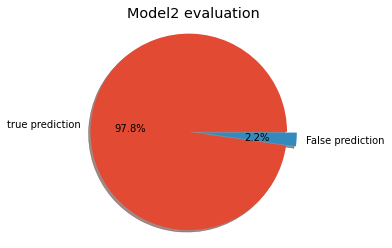

In [ ]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'true prediction', 'False prediction'
sizes = [len(test_df)-modele_reliability, modele_reliability]
explode = (0, 0.1)  
 # only "explode" the 2nd slice (i.e. 'Hogs')
plt.style.use("ggplot")

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode , labels=labels, autopct='%1.1f%%',
        shadow=True)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Model2 evaluation')


plt.show()


##inter

In [ ]:
len(List_img)

224

In [ ]:
df_comparaison_inter_vgg=pd.DataFrame(columns=(['image1','image2','cousine','vrai_person1','vrai_person2']))

In [ ]:
df_comparaison_inter_vgg = pd.DataFrame(list_comp1, columns =['image1', 'image2'])

,image1,image2
0,/content/ColabNotebooks/MyDrive/faces_set/Imag...,/content/ColabNotebooks/MyDrive/faces_set/Imag...
1,/content/ColabNotebooks/MyDrive/faces_set/Imag...,/content/ColabNotebooks/MyDrive/faces_set/Imag...
2,/content/ColabNotebooks/MyDrive/faces_set/Imag...,/content/ColabNotebooks/MyDrive/faces_set/Imag...
3,/content/ColabNotebooks/MyDrive/faces_set/Imag...,/content/ColabNotebooks/MyDrive/faces_set/Imag...
4,/content/ColabNotebooks/MyDrive/faces_set/Imag...,/content/ColabNotebooks/MyDrive/faces_set/Imag...
...,...,...
24971,/content/ColabNotebooks/MyDrive/faces_set/Imag...,/content/ColabNotebooks/MyDrive/faces_set/Imag...
24972,/content/ColabNotebooks/MyDrive/faces_set/Imag...,/content/ColabNotebooks/MyDrive/faces_set/Imag...
24973,/content/ColabNotebooks/MyDrive/faces_set/Imag...,/content/ColabNotebooks/MyDrive/faces_set/Imag...
24974,/content/ColabNotebooks/MyDrive/faces_set/Imag...,/content/ColabNotebooks/MyDrive/faces_set/Imag...


In [ ]:
for index,row in df_comparaison_inter1.iterrows():
  img1=row['image1']
  img2=row['image2']
  face_id1=id_person(img1)
  face_id2=id_person(img2)
  if(id_person==id_person):
    df_comparaison_inter1= df_comparaison_inter1.drop(index)

In [ ]:
df_compare_finale-vgg=pd.DataFrame(columns=(['image1','image2','predicted_person1','predicted_person2']))

In [ ]:
for i in range(224):
  y_predict1 =classifier_model.predict(df_comparaison_inter1['image1'][i])
  y_predict2 =classifier_model.predict(df_comparaison_inter1['image2'][i]
  image1=df_comparaison_inter1['image1'][i]
  image2=df_comparaison_inter1['image1'][i]
  row='image1':image1,'image2':image2,'predicted_person1':y_predict1,'predicted_person2':y_predict2}
  df_compare_finale=df_compare_finale.append(row,ignore_index=True)

In [ ]:
modele_reliability2_vgg=0
for index,row in df_compare_finale.iterrows():
  if row['predicted_person1']==row['predicted_person2']:
    modele_reliability2_vgg=modele_reliability2_vgg+1

In [ ]:
df_comparaison_extract=df_comparaison_inter1

In [ ]:
df_comparaison_extract

,image1,image2,predicted_person1,predicted_person2
0,/content/ColabNotebooks/MyDrive/faces_set/Imag...,/content/ColabNotebooks/MyDrive/faces_set/Imag...,12,12
1,/content/ColabNotebooks/MyDrive/faces_set/Imag...,/content/ColabNotebooks/MyDrive/faces_set/Imag...,103,103
2,/content/ColabNotebooks/MyDrive/faces_set/Imag...,/content/ColabNotebooks/MyDrive/faces_set/Imag...,108,108
3,/content/ColabNotebooks/MyDrive/faces_set/Imag...,/content/ColabNotebooks/MyDrive/faces_set/Imag...,105,105
4,/content/ColabNotebooks/MyDrive/faces_set/Imag...,/content/ColabNotebooks/MyDrive/faces_set/Imag...,25,25
...,...,...,...,...
107,/content/ColabNotebooks/MyDrive/faces_set/Imag...,/content/ColabNotebooks/MyDrive/faces_set/Imag...,8,8
108,/content/ColabNotebooks/MyDrive/faces_set/Imag...,/content/ColabNotebooks/MyDrive/faces_set/Imag...,21,21
109,/content/ColabNotebooks/MyDrive/faces_set/Imag...,/content/ColabNotebooks/MyDrive/faces_set/Imag...,36,36
110,/content/ColabNotebooks/MyDrive/faces_set/Imag...,/content/ColabNotebooks/MyDrive/faces_set/Imag...,94,94


In [ ]:
print("les nombres des  erreur dans les comparaison interclasse = ",modele_reliability2_vgg)

les nombres des  erreur dans les comparaison interclasse =  5


##intra

In [ ]:
for index,row in df_comparaison_inter2.iterrows():
  img1=row['image1']
  img2=row['image2']
  face_id1=id_person(img1)
  face_id2=id_person(img2)
  if(id_person!=id_person):
    df_comparaison_intra1= df_comparaison_intra1.drop(index)

In [ ]:
len(df_comparaison_inter1)

224


In [ ]:
len(df_comparaison_inter_vgg)

In [ ]:
df_compare_finale2=pd.DataFrame(columns=(['image1','image2','predicted_person1','predicted_person2']))

In [ ]:
for i in range(224):
  y_predict1 =classifier_model.predict(df_comparaison_inter1['image1'][i])
  y_predict2 =classifier_model.predict(df_comparaison_inter1['image2'][i]
  image1=df_comparaison_inter1['image1'][i]
  image2=df_comparaison_inter1['image1'][i]
  row='image1':image1,'image2':image2,'predicted_person1':y_predict1,'predicted_person2':y_predict2}
  df_compare_finale_vgg=df_compare_finale_vgg.append(row,ignore_index=True)

In [ ]:
modele_reliability_inter_vgg=0
for index,row in df_compare_finale.iterrows():
  if row['predicted_person1']==row['predicted_person2']:
    modele_reliability_inter_vgg=modele_reliability_inter_vgg+1

In [ ]:
df_comparaison_extract_inter-vgg=df_comparaison_inter1

In [ ]:
df_comparaison_extract_inter-vgg

,image1,image2,predicted_person1,predicted_person2
0,/content/ColabNotebooks/MyDrive/faces_set/Imag...,/content/ColabNotebooks/MyDrive/faces_set/Imag...,12,12
1,/content/ColabNotebooks/MyDrive/faces_set/Imag...,/content/ColabNotebooks/MyDrive/faces_set/Imag...,103,103
2,/content/ColabNotebooks/MyDrive/faces_set/Imag...,/content/ColabNotebooks/MyDrive/faces_set/Imag...,108,108
3,/content/ColabNotebooks/MyDrive/faces_set/Imag...,/content/ColabNotebooks/MyDrive/faces_set/Imag...,105,105
4,/content/ColabNotebooks/MyDrive/faces_set/Imag...,/content/ColabNotebooks/MyDrive/faces_set/Imag...,25,25
...,...,...,...,...
107,/content/ColabNotebooks/MyDrive/faces_set/Imag...,/content/ColabNotebooks/MyDrive/faces_set/Imag...,8,8
108,/content/ColabNotebooks/MyDrive/faces_set/Imag...,/content/ColabNotebooks/MyDrive/faces_set/Imag...,21,21
109,/content/ColabNotebooks/MyDrive/faces_set/Imag...,/content/ColabNotebooks/MyDrive/faces_set/Imag...,36,36
110,/content/ColabNotebooks/MyDrive/faces_set/Imag...,/content/ColabNotebooks/MyDrive/faces_set/Imag...,94,94


In [ ]:
print("les nombres des  erreur dans les comparaison intra = ",modele_reliability_inter_vgg)

les nombres des  erreur dans les comparaison intra =  5


#comparaison


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

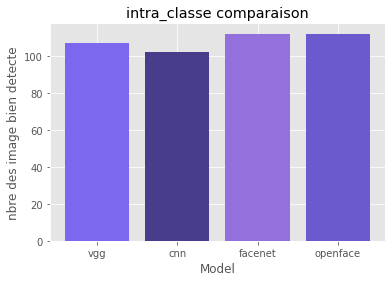

In [ ]:
height = [modele_reliability_intra_VGG, modele_reliability_intra_CNN, modele_reliability_intra_FaceNet, modele_reliability_intra_OpenFace]
left = [1, 2, 3, 4] 
# labels for bars
tick_label = ['vgg', 'cnn', 'facenet', 'openface']
 
# plotting a bar chart
plt.bar(left, height, tick_label = tick_label,
        width = 0.8, color = ['mediumslateblue','darkslateblue', 'mediumpurple','slateblue'])
 
# naming the x-axis
plt.xlabel('Model')
# naming the y-axis
plt.ylabel('nbre des image bien detecte')
# plot title
plt.title('intra_classe comparaison')
 
# function to show the plot
plt.show()

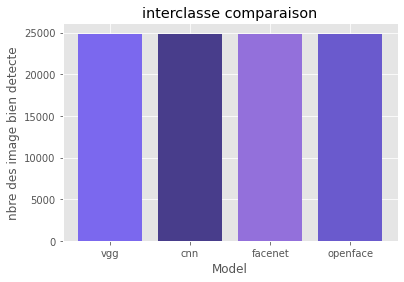

In [ ]:
height = [modele_reliability_inter_VGG, modele_reliability_inter_CNN, modele_reliability_inter_FaceNet, modele_reliability_inter_OpenFace]
left = [1, 2, 3, 4] 
# labels for bars
tick_label = ['vgg', 'cnn', 'facenet', 'openface']
 
# plotting a bar chart
plt.bar(left, height, tick_label = tick_label,
        width = 0.8, color = ['mediumslateblue','darkslateblue', 'mediumpurple','slateblue'])
 
# naming the x-axis
plt.xlabel('Model')
# naming the y-axis
plt.ylabel('nbre des image bien detecte')
# plot title
plt.title('inter_classe comparaison')
 
# function to show the plot
plt.show()

In [ ]:
nbre_comp_inter=len(df_comparaison_inter1)


In [ ]:
ar = np.array([[nbre_comp_inter, nbre_comp_inter, nbre_comp_inter, nbre_comp_inter], [modele_reliability_inter_OpenFace,modele_reliability_inter_OpenFace,modele_reliability_inter_OpenFace, modele_reliability_inter_OpenFace])
df = pd.DataFrame(ar, index = ['nbre de comparasion inter_classe', 'nbre des erreur'], columns =[['vgg', 'cnn', 'facenet', 'openface']])


In [ ]:
df

,vgg,cnn,facenet,openface
nbre de comparasion inter_classe,24863,24863,24863,24863
nbre des erreur,5,10,0,0


In [ ]:
nbre_comp_intra=len(df_comparaison_intra1)

In [ ]:
ar = np.array([[nbre_comp_intra, nbre_comp_intra, nbre_comp_intra, nbre_comp_intre], [modele_reliability_intra_OpenFace,modele_reliability_intra_OpenFace,modele_reliability_intra_OpenFace, modele_reliability_intra_OpenFace])
df = pd.DataFrame(ar, index = ['nbre de comparasion intra_classe', 'nbre des erreur'], columns =[['vgg', 'cnn', 'facenet', 'openface']])


In [ ]:
df

,vgg,cnn,facenet,openface
nbre de comparasion intra_classe,112,112,112,112
nbre des erreur,5,8,0,0


le nobre de comparaison intra errone 